5章 モデルの評価と改良
（教師あり学習のモデルの評価とパラメータの選択）

モデルの評価：
- 教師あり学習：　定量的
- 教師なし学習：　定性的

教師あり学習の評価：
- scoreメソッド：　R^2スコア。正しく分類されたサンプルの割合を計算
- 他

評価：
- 交差検証：　より頑健な汎化性能評価手法
- 分類と回帰の評価でもscoreメソッドのR^2より良い方法を探す
- グリッドサーチ


In [2]:
# インポート集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import os
%matplotlib inline

In [3]:
# 評価（scoreメソッド）
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# データロード
x,y = make_blobs(random_state=0)
# データ分割
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
# ロジスティク回帰
ml = LogisticRegression().fit(ax,ay)
# スコア
ml.score(ex,ey)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.88

In [4]:
# -> 88%

5.1 交差検証
- 汎化性能を評価する統計手法
- データ分割を何度も行い、複数のモデルを訓練
- k分割交差検証が多い（層化、グループ付きも）
- 新しいデータに適用するためのモデルを作る方法ではない。（モデルを返さない）
- 目的：　アルゴリズムがあるデータに対してどの程度汎化できるか評価するだけ


交差検証の長所：
- 信頼性高い（一度だけの分割(train_test_split）では、たまたまで精度の良し悪しが出る）
- モデルの性能の幅がわかる（irisでは90% ~ 100%の範囲で変動）（最良と最悪）

短所：
- 計算コスト（1回の分割よりk倍遅くなる）

パラメータ：
- cv：　ユーザが設定する分割数。
 - cvに交差検証分割器を与えると、データの分割方法を詳細に制御可能
 
sklearnのデフォルト：
- 分類：　層化k分割交差検証
- 回帰：　k分割交差検証

k分割交差検証(k-fold cv)：
- k：　データの分割数。ユーザが決定。5から10が多い
- 手順（5分割の場合）：
 1. 最初の1つをテストセットとし、残り4つを訓練セットとしてモデル構築、精度評価。
 2. 次に2つ目をテストセットし、残り4つを訓練セットとしてモデル構築、精度評価。
 3. 同様に5回繰り返して5つの精度を求める
 
層化k分割交差検証(stratified k-fold cv)：
- 各分割後のセット内でのクラスの比率が全体のクラス比率と同じになるように分割。

1つ抜き交差検証(leave one out)：
- k分割交差検証の個々の分割セットが1サンプルだけのもの（毎回1サンプルだけをテスト）
- 非常に遅いが、より良い評価が可能

シャッフル分割交差検証(ShuffleSplit cv)：
- 非常に柔軟
- 毎回train_size個の点を選び訓練セットとし
  test_size個の（訓練セットと重複しない）点を選びテストセットとする
- これをn_iter回繰り返す。
- サイズ指定は整数（個数）or 小数（割合）
- 訓練セットとテストセットのサイズとは独立に、繰り返し回数を指定可能（これが役立つ場面も多い）
- train_sizeとtest_sizeの和が1にならないように設定することで、データの一部だけ用いることも可。
 - これをサブサンプリングと呼び、データセットが大きい場合に有効
- 層化バージョン：　StratifiedShuffleSplit　（クラス分類に有効）

グループ付き交差検証(GroupFold cv)：
- データセットの中に、密接に関係するグループがある場合に用いられる
- 例：　顔画像からの感情認識タスク：　
 - 層化交差検証では同じ人の顔が訓練セットとテストセットに出現（簡単なはずなので困る）
 - GroupFoldなら、引数のgroup配列に、画像に写っている人を指定。
 - group配列：　
   - 訓練セットとテストセットの分割時に分割してはならないグループを表す（クラスラベルと異なる）
- 応用：
 - 発話認識
   -  同じ話者の発話録音データが複数あるが、認識したいのは新しい話者の発話
 - 医療用アプリケーション
   - 同じ患者から複数のサンプルが得られるが、欲しいのは新しい患者への汎化性能

sklearnの様々な交差検証：
- http://scikit-learn.org/stable/modules/cross_validation.html 



 

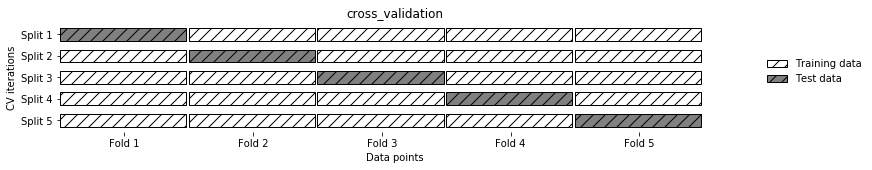

In [5]:
# k分割交差検証の様子（5分割サンプル）
mglearn.plots.plot_cross_validation()

In [6]:
# k分割交差検証 x iris
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# データロード
d = load_iris()
x = d.data
y = d.target
# ロジスティック回帰
ml = LogisticRegression()
# k分割交差検証スコア
s = cross_val_score(ml, x, y)
s

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWar

array([0.96078431, 0.92156863, 0.95833333])

In [7]:
# -> k分割交差検証　：　デフォルトで3分割（3つの精度算出）

In [8]:
# 分割数を5に変更（パラメータcv=5）
s = cross_val_score(ml, x, y, cv=5)
s

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [9]:
# -> 5値になった

In [10]:
# 交差検証の精度をまとめるには、一般に平均値を用いる
s.mean()

0.9600000000000002

In [11]:
# -> モデルが９６％の割合で正しいといえる。5つの値がバラつくのは、データセットが小さいせいもある。

In [12]:
# データセットをk分割する際に、データセットの先頭から1/k個取るのは良くないケースもある
from sklearn.datasets import load_iris
d = load_iris()
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# -> これで先頭から3分割したら、精度は0になる。

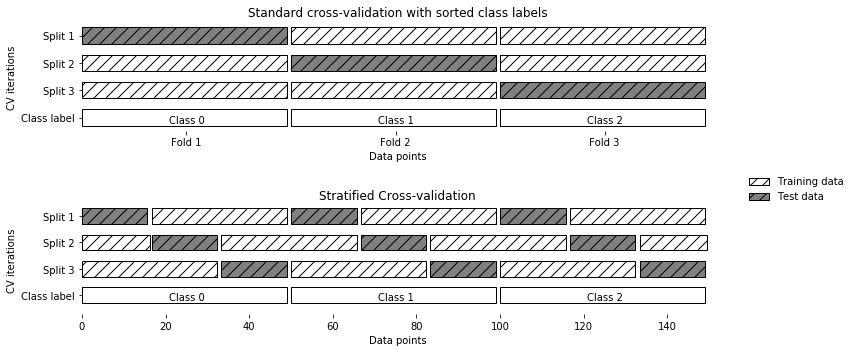

In [14]:
#　層化k分割交差検証（分類でのデフォルト）(分割後のセット内のクラス比率が全体と同じになるよう分割)
mglearn.plots.plot_stratified_cross_validation()

In [15]:
# 分類でk分割交差検証（層化でないバージョン）（KFold分割器で分割し、引数として渡すだけ）
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
cross_val_score(ml, x, y, cv=kf)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [16]:
# 　irisで試す
kf = KFold(n_splits=3)
cross_val_score(ml, x, y, cv=kf)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0., 0., 0.])

In [17]:
# -> 見事０％

In [18]:
# 層化の他に、データをシャッフルしてもいい（KFoldのパラメータshaffle=True）
# シャッフルする場合、random_stateも設定して再現可能にすると良い
kfs = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(ml, x, y, cv=kfs)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.9 , 0.96, 0.96])

In [19]:
# -> シャッフルで解決

In [20]:
# 1つ抜き交差検証（分割セット内には1点だけ（遅いが、より正確な精度が出せる））
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
s = cross_val_score(ml, x, y, cv=loo)
print(len(s))
print(s.mean())

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

150
0.9533333333333334


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

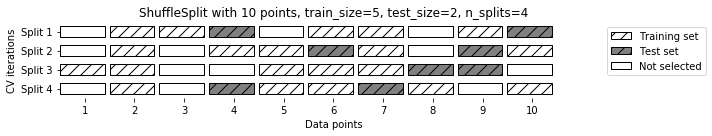

In [21]:
# シャッフル分割交差検証（サンプル）（訓練サイズ5, テストサイズ2、分割数4）
mglearn.plots.plot_shuffle_split()

In [22]:
# シャッフル分割交差検証 （訓練サイズ50%, テストサイズ50%、分割数10指定）
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
s = cross_val_score(ml, x, y, cv=ss)
s

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.86666667, 0.86666667, 0.92      , 0.94666667, 0.97333333,
       0.97333333, 0.89333333, 0.86666667, 0.94666667, 0.97333333])

In [23]:
# グループ付き交差検証
from sklearn.model_selection import GroupKFold
# データロード（データ数12点）
x,y = make_blobs(n_samples=12, random_state=0)
# 最初の3サンプルを同じグループに、次の4つを同じグループに、グループインデックス指定でグループ化
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
# スコア（3分割）
cross_val_score(ml, x, y, groups, cv=GroupKFold(n_splits=3))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

array([0.75      , 0.8       , 0.66666667])

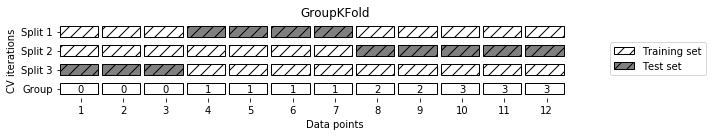

In [24]:
# グループ付き交差検証（サンプル）
mglearn.plots.plot_group_kfold()

5.2 グリッドサーチ
- パラメタ調整手法の一つ
- 基本的に全てのパラメタの組み合わせを試す方法

例：　RBFのSVM：　
- クラス：　SVC
- パラメタ：
 - gamma：　カーネルのバンド幅
 - C：　正則化パラメタ
 - グリッドサーチでgammaとCを0.001, 0.01, 1, 10, 100の6種類に降る（計36通り）

In [25]:
# 単純なグリッドサーチ（悪例）
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# データロード
d = load_iris()
x = d.data
y = d.target
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
# ベストスコア用変数用意
best_s = 0
# gammmaとCを各6通り振る（計36通り）
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # SVCモデル定義・学習
        ms = SVC(gamma=gamma, C=C)
        ms.fit(ax, ay)
        # スコア算出
        s = ms.score(ex, ey)
        # スコアがベストより高ければ
        if s > best_s:
            # ベストにスコアを代入
            best_s = s
            # ベストパラメタにパラメタを代入
            best_p = {'C': C, 'gamma': gamma}
            
#　訓練データ形状とテストデータ形状表示
print(ax.shape[0], ex.shape[0])
# ベストスコア、ベストパラメタ表示
print(best_s)
print(best_p)

112 38
0.9736842105263158
{'C': 100, 'gamma': 0.001}


In [26]:
# -> パラメタ36通り試して、C=100, gamma=0.001がmaxスコア(97%)とわかった

#  ただし、このデータセットに対してその精度のモデルを見つけたとは言えない理由：
#  このテストセットに対して最高精度が出るパラメタを発見。
#  このテストセットはパラメタ調整に使ったので、モデルの精度評価には使ってはいけない。

# （データを訓練データとテストセットに分割する理由と同じ。
# モデルを評価するためのデータは、モデルの構築には用いていない、独立したデータでなければいけない。）

# 解決法：　データをもう一度分割し、３セットにする
# - 訓練セット：　モデル構築用
# - 検証セット：　モデルパラメタ選択用　(開発セット)
# - テストセット：　選択したパラメタ性能評価

# 検証セットで最良のパラメタ選択したら、そのパラメタでモデルを再構築
# （訓練データだけでなく検証データも用いる（可能な限りデータを有効利用してモデル構築可能））


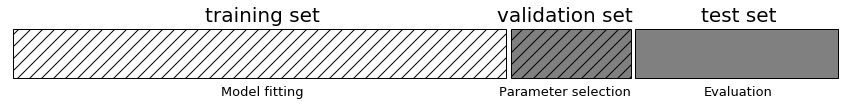

In [27]:
# データ3分割の図
mglearn.plots.plot_threefold_split()

In [28]:
# グリッドサーチ（データ3分割）
from sklearn.svm import SVC
# データ分割（まずx,yをいつもの２分割）
avx, ex, avy, ey = train_test_split(x, y, random_state=0)
# データ分割（avxとax, vxに分け、avyをay, vyに分ける。３分割完成）
ax, vx, ay, vy = train_test_split(avx, avy, random_state=1)
# ベストスコア用変数用意
best_s = 0
# gammmaとCを各6通り振る（計36通り）
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # SVCモデル定義・学習
        ms = SVC(gamma=gamma, C=C)
        ms.fit(ax, ay)
        # スコア算出（検証用データ使用！）
        s = ms.score(vx, vy)
        # スコアがベストより高ければ
        if s > best_s:
            # ベストにスコアを代入
            best_s = s
            # ベストパラメタにパラメタを代入
            best_p = {'C': C, 'gamma': gamma}
            
# 訓練セットと検証セットでモデルを再構築し、テストセットで評価
ms = SVC(**best_p)
ms.fit(avx, avy)
es = ms.score(ex, ey)            
# ベストスコア、ベストパラメタ、テストスコア表示
print(best_s)
print(best_p)
print(es)


0.9642857142857143
{'C': 10, 'gamma': 0.001}
0.9210526315789473


In [29]:
# -> 検証セットに対するベストスコアは96%で、若干低くなった（理由：　データ量が減ったため）
#      新しいデータ（テストセット）に対するスコアは92%であり、汎化性能として主張できるのはこちらの数字になる。

# 訓練セット、検証セット、テストセットの区別は機械学習の実運用で根本的に重要！
# テストセットからモデルへ情報漏洩がないように分離。（信頼できなくなる）

# 全ての探索的な解析とモデル選択は訓練セットと検証セットで行うこと
# （テストセットは最後の評価にだけ使用）
# （探索的可視化だけの場合でも重要）

# 厳密に言えば、テストセットで2つ以上のモデルを評価して良い方を選ぶだけでもダメ

# 上記では、1回目はC=10, gamma=0.001、　2回目はC=100, gamma=0.001が最良で結果が変わった。

In [30]:
# 交差検証を用いたグリッドサーチ
# （各パラメタ計36通りに対して5分割交差検証し、5つの精度を出す。その平均値が最大となるパラメタを選択）
# （遅いのが難点）
for gamma in [0.001, 0.01, 0.1, 1, 10,100]:
    for C in [0.001, 0.01, 0.1, 1, 10,100]:
        # 各パラメタでモデル構築
        ms = SVC(gamma=gamma, C=C)
        # 交差検証スコア算出(分割数5)
        ss = cross_val_score(ms, avx, avy, cv=5)
        # 平均をとる
        s = np.mean(ss)
        # スコアがベストより高ければ
        if s > best_s:
            # ベストにスコアを代入
            best_s = s
            # ベストパラメタにパラメタを代入
            best_p = {'C': C, 'gamma': gamma}
            
# 訓練セットと検証セットでモデルを再構築し、テストセットで評価
ms = SVC(**best_p)
ms.fit(avx, avy)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


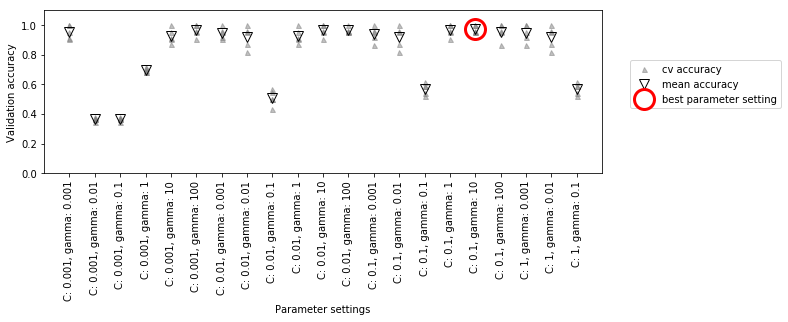

In [31]:
# 交差検証を用いたグリッドサーチ（可視化サンプル）
mglearn.plots.plot_cross_val_selection()

In [32]:
# -> 赤丸：　平均値が最大となるパラメタ組み合わせの精度

# 交差検証を用いたグリッドサーチを指して、単に交差検証という場合もある

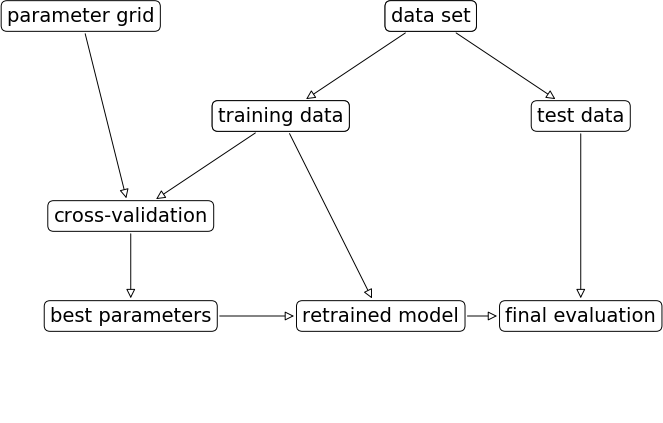

In [33]:
# 交差検証を用いたグリッドサーチ（フローチャートサンプル）
mglearn.plots.plot_grid_search_overview()

交差検証を用いたグリッドサーチ：
- 非常によく使われる
- sklearnのGridSearchCVクラスで使用可能
- まず辞書形式でパラメタ指定
- 計算量的に高価→　比較的粗いグリッドで始めるべき

GridSearchCV：
- 通常の分類モデルと同様fit、predict、scoreメソッド使える
- デフォルト：　分類→　層化k分割交差検証、回帰→　k分割交差検証を使用
- cross_val_scoreと同様、分割器をcvパラメタとして渡せる。
 - 時間短縮したいときはShuffleSplit or StratifiedShuffleSplitでn_iter=1を指定するなど。
 
条件付きのグリッドサーチ：
- SVCのKernelパラメータ：　この選択により、他のパラメタが使われるかどうかが決まる。
 - kernel='linear'：　線形モデル　→　パラメタC使用
 - kernel='rbf'：　RBFカーネル　→　パラメタC, gamma使用
 - -> 各条件を個々の辞書形式で描き、辞書をリスト化すればいい
 
ネストした交差検証：
- データを訓練セットとテストセットに分割するのを1回だけでなく、交差検証で何度も行う手法
- ループ内で分割し、グリッドサーチを行う（各分割に対するベストパラメタは異なる可能性あり）
- 各分割に対し、最良のセッティングでテストセットを評価
- 出力：　スコアのリスト（このモデルのグリッドから見つけた最適パラメタによる汎化性能がわかる）
 - 新しいデータに対して利用できるモデルを与えるわけではない

交差検証とグリッドサーチの並列化：
- 多くのパラメタ組み合わせに対し、大規模データセットでグリッドサーチ：　単純並列作業
 - （ある分割に対するあるパラメタ設定でのモデル構築は、他とは独立）
 - → 複数のCPUコアやクラスタ向き
 - GridSearchCV、cross_val_scoreのパラメータn_jobs：　利用したいコア数指定。-1指定で全て使用
 - ただしsklearnでは、ネストした並列実行は非サポート
   - （モデルでn_jobs使ったら交差検証GridSearchCVでは使えない）
 - データセットやモデル大　→　多くのコアを使用するとメモリ使いすぎの場合あり（メモリ監視必要）
 - グリッドサーチと交差検証を複数マシンで並列化することも可能だが、
  - sklearn：　非サポート
  - IPython：　並列化フレームワークで並列グリッドサーチを実装可能
    - （単純なグリッドサーチのように、forループ書ける）
  - Sparkユーザなら、spark-sklearnパッケージでグリッドサーチをSparkクラスタで実行可能
    - https://github.com/databricks/spark-sklearn

  
 

In [34]:
# 交差検証を用いたグリッドサーチ（GridSearchCVクラス使用）
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# パラメタ辞書作成（計36通り）
pg = {'C': [0.001, 0.01, 0.1, 1, 10,100],
     'gamma': [0.001, 0.01, 0.1, 1, 10,100]}
# グリッドサーチオブジェクト作成（モデル、パラメタ辞書、分割数5指定）
gs = GridSearchCV(SVC(), pg, cv=5)
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
gs.fit(ax,ay)

# 訓練セットに対する交差検証のスコア（平均交差検証精度）
print(gs.best_score_)
# 交差検証で最高精度を出したパラメタ
print(gs.best_params_)

0.9732142857142857
{'C': 100, 'gamma': 0.01}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
# -> 97%。重要なのは、このパラメタを選ぶのにテストセットを使わなかったこと。

In [36]:
# 最良のパラメタを用いて訓練セットで訓練したモデルの詳細
print(gs.best_estimator_)
# 最良のパラメタを用いて訓練セットで訓練したモデルによるスコア
print(gs.score(ex,ey))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.9736842105263158


In [37]:
# 交差検証の可視化（DataFrame形式の方が見やすいので変換）
import pandas as pd
df = pd.DataFrame(gs.cv_results_)
display(df.head());

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000618,0.000108,0.000287,0.000053,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000557,0.000081,0.000295,0.000093,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000613,0.000126,0.000303,0.000072,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000626,0.000046,0.000348,0.000088,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000535,0.000055,0.000245,0.000012,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


In [38]:
# -> 各行が特定のパラメタの組み合わせに相当。

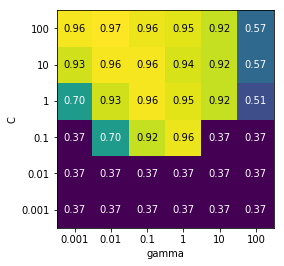

In [39]:
# 平均検証スコアの行列化（numpy配列化し、可視化するために6行6列に整形）
s = np.array(df.mean_test_score).reshape(6,6)
# 平均交差検証スコアのヒートマッププロット（横軸にgamma、縦軸にCで明るさで度合いを表す）
mglearn.tools.heatmap(s, 
                      xlabel='gamma', 
                      xticklabels=pg['gamma'],
                      ylabel='C', 
                      yticklabels=pg['C'], 
                      cmap="viridis");

In [40]:
# -> ヒートマップの各点　：　特定のパラメタ設定に対する一回の交差検証実行結果
# 色　：　交差検証精度　（明るいほど高精度）

# -> C=0.１を境に精度が全く異なることに注意（37% <-> 96%)

# -> パラメタ調整は非常に重要（30%が90%に変わることもある）（Cとgammaの組み合わせ）
# -> パラメタのレンジを充分に広く取ること（ヒートマップで全体を見渡せること）

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


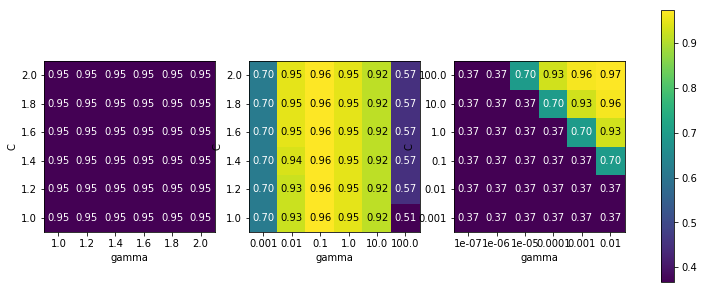

In [41]:
# ヒートマップの悪例3つ（パラメタレンジが狭く、全体を見渡せていない例）
f,a1 = plt.subplots(1,3, figsize=(13,5))
# パラメタ設定3つ
pg1 = {'C': np.linspace(1,2,6), 'gamma': np.linspace(1,2,6)}
pg2 = {'C': np.linspace(1,2,6), 'gamma': np.logspace(-3,2,6)}
pg3 = {'C': np.logspace(-3,2,6), 'gamma': np.logspace(-7,-2,6)}
# 3つのパラメタ設定を各サブプロットにプロット
for pg, a in zip([pg1, pg2, pg3], a1):
    gs = GridSearchCV(SVC(), pg, cv=5)
    gs.fit(ax, ay)
    # 平均検証スコアの行列化（numpy配列化し、可視化するために6行6列に整形）
    s = gs.cv_results_['mean_test_score'].reshape(6,6)
    # 平均交差検証スコアのヒートマッププロット（横軸にgamma、縦軸にCで明るさで度合いを表す）
    si = mglearn.tools.heatmap(s, 
                      xlabel='gamma', 
                      xticklabels=pg['gamma'],
                      ylabel='C', 
                      yticklabels=pg['C'], 
                      cmap="viridis",
                      ax=a);
# カラーバー
plt.colorbar(si, ax=a1.tolist());

In [42]:
# ->　左図：　全て同じ色（レンジが狭すぎて全体を見らていない or パラメタ調整が無意味）
#                -> より極端な値を試すべき
#      中図：　縦シマ模様（横軸のgammaだけが精度に影響している。　Cが無意味な可能性も）
#                -> より極端なCの値を試すべき
#   　  右図：　右上が明るい（そっちの方に広くパラメタを降ってみるといい）
#                -> より極端な値を試すべき

# テスセットを使わなければ、パラメタグリッドを交差検証スコアで調整して良い。
# テストセットを使った評価は、どのモデルを使うか決めてから、一度だけ行える。

In [43]:
# 条件付きグリッドサーチ（RBFカーネルならCとgamma、　線形ならCだけ、など）
pg = [{'kernel' : ['rbf'],
      'C': [0.001, 0.01, 0.1, 1, 10, 100],
      'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
     {'kernel': ['linear'],
     'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print(pg)


[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [44]:
# 上記リスト使用
gs = GridSearchCV(SVC(), pg, cv=5)
gs.fit(ax,ay)
# ベストパラメタと交差検証精度
print(gs.best_params_)
print(gs.best_score_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.9732142857142857


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
# 詳細
df = pd.DataFrame(gs.cv_results_)
df.T

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000590611,0.000571585,0.000506353,0.000554276,0.000519323,0.000567436,0.000530577,0.000518608,0.00059185,0.000607347,...,0.000379276,0.000402832,0.000771189,0.000669622,0.000515175,0.000412607,0.000399113,0.000395584,0.00034771,0.000422239
std_fit_time,9.51086e-05,5.92541e-05,1.09136e-05,4.51365e-05,2.26216e-05,7.03481e-05,4.76424e-05,6.53502e-05,0.000104134,5.99598e-05,...,6.13688e-05,1.13198e-05,0.000140332,3.08221e-05,6.56703e-05,1.89435e-05,4.47658e-05,6.63324e-05,1.34063e-05,5.13695e-05
mean_score_time,0.000273371,0.0002841,0.00027833,0.000325966,0.000282764,0.000286674,0.000265789,0.000262403,0.000267553,0.000322676,...,0.000234604,0.000215149,0.000288963,0.000245333,0.00025239,0.000216627,0.000268459,0.000216866,0.000203276,0.000278187
std_score_time,5.49213e-05,2.97974e-05,7.51019e-05,0.000146622,9.50174e-05,4.04336e-05,5.78039e-05,6.08737e-05,4.10616e-05,4.86198e-05,...,2.10852e-05,3.18304e-06,5.52393e-05,8.23149e-06,3.17763e-05,3.77154e-06,7.76139e-05,1.93255e-05,3.15074e-06,7.80523e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


In [46]:
# -> kernel=linearの時、Cだけを振っていることがわかる（36列目以降）（見やすくするため転置しているので注意）

In [47]:
# ネストした交差検証
gs = GridSearchCV(SVC(), pg, cv=5) # 5分割
s = cross_val_score(gs, x, y, cv=5) # 5分割
print(s)
print(s.mean())

[0.96666667 1.         0.9        0.96666667 1.        ]
0.9666666666666668


In [48]:
# -> SVCはこのデータセットに対して交差検証精度の平均で98%を達成可能といえる

In [49]:
# 内側のループと外側のループ双方に層化5分割交差検証を用いた：　計算量的に高価
# （パラメタ36通り x ネスト交差検証5回 x 交差検証5回 = 900通りのモデル構築）
# 内側と外側のループで別の交差検証手法を用いることもできる

In [50]:
# ネストした交差検証の詳細（上記の中身を理解する）
def nested_cv(x, y, cvi, cvo, mc, pg):
    # スコアリスト
    so = []
    # 外側の交差検証ループ（個々の分割に対する）（splitメソッドはインデックスを返す）
    for asa, esa in cvo.split(x,y):
        # ベストパラメタ、ベストスコア初期化（内側の交差検証を用いて最良のパラメタ設定を見つける）
        pb = {}
        sb = -np.inf # -無限大にしておく
        # パラメタを取り出し
        for p in pg:
            # 内側の分割に対するスコアを格納
            sin = []
            # 内側の交差検証ループ
            for ain, ein in cvi.split(x[asa],y[asa]):
                # 与えられたパラメータと訓練セットで分類器を訓練
                m = mc(**p)
                m.fit(x[ain], y[ain])
                # 内側のテストセットを評価
                s = m.score(x[ein], y[ein])
                sin.append(s)
            # 内部の分割に対するスコア平均
            sm = np.mean(sin)
            # もしベストスコアより良ければベストスコア更新、ベストパラメタ更新
            if sm > sb:
                sb = sm
                pb = p
        # ベストパラメタと外側の訓練セットで分類器構築
        m = mc(**pb)
        m.fit(x[asa], y[asa])
        # 評価
        so.append(m.score(x[esa], y[esa]))
    return np.array(so)

In [51]:
# irisデータセットに適用
from sklearn.model_selection import ParameterGrid, StratifiedKFold
s = nested_cv(x, y, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(pg))
s

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

5.3 評価基準とスコア
- これまでは、分類性能は精度（正確に分類されたサンプルの割合）、回帰性能は R^2で評価
- 精度ではうまくいかない場合がある。
- 実問題への応用前に、何らかの評価基準で評価必要（自動運転車の歩行者回避などをいきなり試せない）

- ビジネス評価基準：　ビジネス上の最終的な目標。これを忘れないこと。
 - 交通事故を防ぐ、病院への入院回数を減らす、などのために機械学習を用いている。
 - Webサイトなら多くのユーザの獲得、店舗ならユーザに多くのお金を使わせるなど。
 - モデルの選択やパラメタ選択は、これらのビジネス基準に対して最適なものを選択。
- ビジネスインパクト：　機械学習アプリケーションに対して特定のアルゴリズムを選択した結果のこと

2クラス分類における基準
- 実用上最も一般的
- 最も単純な機械学習
- 精度がうまくいかないケース：　間違えた回数には、興味がある情報が全て含まれているわけでないため
 - 健康診断：　陽性→再検査、陰性→健康。
  - 偽陽性：　（＝タイプⅠエラー）健常者を再検査
  - 偽陰性：　（＝タイプⅡエラー）病気があるのに見逃し。深刻。
- 偽陽性と偽陰性に値段をつけると、精度の代わりに損失額で評価可能。

偏ったデータセット：
- クラス内のデータ点割合が偏っているもの（クラス1に99点、クラス2に1点しかないなど）
 - 例：　クリックスルー予測：　
   - 各データ点：　ユーザに提示されたアイテム（広告 or ページ or SNSフォロー）のインプレッション
   - 目的：　あるアイテムをユーザに提示した時に、ユーザがそれをクリックかどうかを予測
   - 実際には1%程度　→　偏ったデータセットという
- エラーのタイプは、2クラスの一方がもう一方よりずっと多い場合（偏ったデータセット）で重要
- 精度では無理（モデルが何もしなくても、常に「クリックされない」と予測するだけで精度は99%）

In [52]:
# 偏ったデータセット作成
from sklearn.datasets import load_digits
# データロード
d = load_digits()

In [53]:
# ラベルのユニーク値を確認
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [54]:
# -> digitsデータのラベルは0~9まである　→　0~9までの数字データが存在する

In [55]:
# 偽の分類器を試す
# ラベルが9の場合のみyとする
y = d.target == 9
ax,ex,ay,ey = train_test_split(d.data, y, random_state=0)
# 偽の分類器で予測
from sklearn.dummy import DummyClassifier
# most_frequent　：　頻度が高いものを返すだけ。偽物。
mf = DummyClassifier(strategy='most_frequent').fit(ax,ay)
# 予測結果p
pf = mf.predict(ex)
# 予測結果pのユニーク値を表示
print(np.unique(pf))
# 精度
print(mf.score(ex,ey))

[False]
0.8955555555555555


In [56]:
# → 偽の分類器はFalseとしか予測していない。にも関わらず精度89%　（偏ったデータに精度は使えない）

In [57]:
# 本物の分類器１
from sklearn.tree import DecisionTreeClassifier
mt = DecisionTreeClassifier(max_depth=2).fit(ax, ay)
pt = mt.predict(ex)
print(mt.score(ex,ey))

0.9177777777777778


In [58]:
# →　本物の分類器で精度91%。偽物と変わらない。
#      精度という基準では判断できないか、本物の使い方を間違えたかのどちらか（おそらく前者）

In [59]:
# 偽物と本物の精度比較2
# 偽物
from sklearn.linear_model import LogisticRegression
# ランダム値を返すだけの偽物
md = DummyClassifier().fit(ax, ay)
pd = md.predict(ex)
print(md.score(ex,ey))
# 本物
ml = LogisticRegression(C=0.1).fit(ax,ay)
pl = ml.predict(ex)
print(ml.score(ex,ey))

0.8088888888888889
0.9777777777777777


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
# -> 偽物でも80%出ている　→　精度を使うのは不適切。

混同行列：

|予測o|予測x|
|:-:|:-:|
|真陰性|偽陽性|
|偽陰性|真陽性|

- (=confusion_matrix)
- 評価基準の1つ。
- 2x2の配列
- 行：　実際のクラス
- 列：　予測されたクラス
- 各要素：　行に対応するクラスが、列に対応するクラスに分類された回数を示す
- 主対角線（TN, TP）：　正しく分類された数を表す

- 偽陽性：　陽性予測がミスっている割合。（予測が陽性、実際は陰性）（予測ミス）
- 偽陰性：　陰性予測がミスっている割合。（予測が陰性、実際は陽性）（予測ミス）

精度
- (Accuracy)
- 精度 = (TP + TN) / (TP + TN + FP + FN)　
- 正確な予測(TP+TN)を全サンプル数で割った値

適合率：
- （Precision）（陽性的中率（Positive Predictive Value : PPV））
- 適合率(Precision) = TP / (TP + FP)　：　予測が陽性の内の正解した割合
- 偽陽性の数を減らしたい場合に用いる（新薬の臨床試験に使う薬選別など）
 - 臨床試験は高価なので、本当に効く薬だけ試したい　＝　偽陽性を減らしたい

再現率：
- （Recall）（感度（sensitivity）、ヒット率（hit rate）、真陽性率（true positive rabe：TPR）
- 再現率 = TP / (TP + FN) ：　実際が陽性の内、正解した割合
- 偽陰性を減らしたい場合に用いる（健康診断など（見逃しは命に関わる））
- 適合率と再現率はトレードオフ（全て陽性と予測すれば再現率は100%だが、適合率は非常に低い）

TN, TPなどを用いた様々な基準：
- wikipedia（https://en.wikipedia.org/wiki/Sensitivity_and_specificity ）

f-値：
- （f-スコア）（f-measure）
- 適合率と再現率の調和平均
- 適合率と再現率を取り入れているため、偏った2値分類データセットに対して精度より良い基準となる。

f1-値：
- f値の一つ
- F = 2PR / (P+R)
- 2値分類では、精度より信頼できる（ただし解釈・説明が難しい）

適合率、再現率、f-値の集計レポート
- classification_report関数
- クラスごとに、そのクラスを陽性とした場合の適合率、再現率、f-値、支持度（support）を表示
 - 支持度：　そのクラスのサンプル数
- 最後の行：　各クラスのサンプル数で重み付けした平均値 (加重平均）（weighted avg）

閾値を動かして調整：
- 偏ったデータの場合や、 適合率か再現率を上げたい場合に有効
- 健診などは、少数クラスの再現率(実際陽性の内の正解率）を高めることが重要　→　閾値を動かして調整可能
 - （偽陽性（陽性予測が外れること）増やしても、より多くの真陽性得たい）
- デフォルト　：　decision_function=0以上ならクラス１に分類
- クラス1への分類を増やしたい場合、閾値を減らす（0 → -0.8など）
- decision_functionの値は範囲が決まっていないため、良い閾値を決め方にルールはない。
- 閾値の設定には検証セットを使うか、交差検証を使う（テストセットでは楽観的な結果になってしまう）
- predict_probaを持つモデルなら簡単（predict_probaの出力は0~1（確率）
- （デフォルト0.5 : モデルが50%以上確かだと判断すれば陽性分類）
- ただし、確信度が正確である保証はない（深さ制限のない決定木　：　常に100%確実だと判断）
 - これに対応するのは較正。較正されたモデルは、確信度に対して正確。詳細は下記。
   - 「Predicting Good Probabilities with Supervised Learning」(Alexandru Niculescu-Mizilら)
   

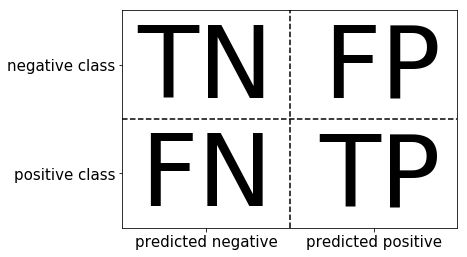

In [61]:
# 混同行列サンプル
mglearn.plots.plot_binary_confusion_matrix()

[[401   2]
 [  8  39]]


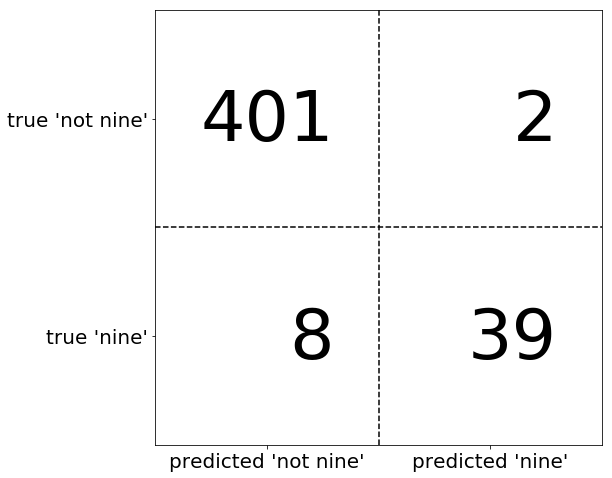

In [62]:
# 混同行列（上記のロジスティック回帰の結果を見る）
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ey, pl)
print(cm)
mglearn.plots.plot_confusion_matrix_illustration()

In [63]:
# -> 真陰性：　予測がNOT9、実際がNOT9 : 401で最多

In [64]:
# 混同行列（上記全て）
print("most_freq")
print(confusion_matrix(ey, pf))
print("random")
print(confusion_matrix(ey, pd))
print("tree")
print(confusion_matrix(ey, pt))
print("logistic")
print(confusion_matrix(ey, pl))

most_freq
[[403   0]
 [ 47   0]]
random
[[343  60]
 [ 43   4]]
tree
[[390  13]
 [ 24  23]]
logistic
[[401   2]
 [  8  39]]


In [65]:
# → most_freq ： 常に予測が同じ（変）
# →　ロジスティック回帰がベスト（主対角線のTN, TPが401, 39で値が多い）

In [66]:
# f値
from sklearn.metrics import f1_score
print("most_freq : ", f1_score(ey, pf))
print("random : ", f1_score(ey, pd))
print("tree : ", f1_score(ey, pt))
print("logistic : ", f1_score(ey, pl))

most_freq :  0.0
random :  0.07207207207207207
tree :  0.5542168674698795
logistic :  0.8863636363636364


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
# -> 偽の2つと本物の2つを、数字で明確に判別できている。（悪いものを見分けられている）
# 　　　　most_freqで0が出ているのは、陽性予測が0で、分母が0になるため

In [68]:
# 適合率、再現率、f-値の集計（分類レポート）(most_freq)
from sklearn.metrics import classification_report
print(classification_report(ey, pf, target_names=["not9", "9"]))

              precision    recall  f1-score   support

        not9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
# 適合率、再現率、f-値の集計（分類レポート）(dummy(random))
print(classification_report(ey, pd, target_names=["not9", "9"]))

              precision    recall  f1-score   support

        not9       0.89      0.85      0.87       403
           9       0.06      0.09      0.07        47

   micro avg       0.77      0.77      0.77       450
   macro avg       0.48      0.47      0.47       450
weighted avg       0.80      0.77      0.79       450



In [70]:
# 適合率、再現率、f-値の集計（分類レポート）(ロジスティック回帰)
print(classification_report(ey, pl, target_names=["not9", "9"]))

              precision    recall  f1-score   support

        not9       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



In [71]:
# → f値の平均では、偽物と本物の区別がつかない（どちらのクラスを陽性とするかで値が大きく変わるため）
#　　　　　f値の各クラスの値を見れば明らかにわかるので、そこで判断する必要あり

予測の不確実性を評価
- decision_function
- predict_proba
- 予測を行うということは、これらの出力をある閾値で分けること
 - decision_function：0, predict_proba：0.5



/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


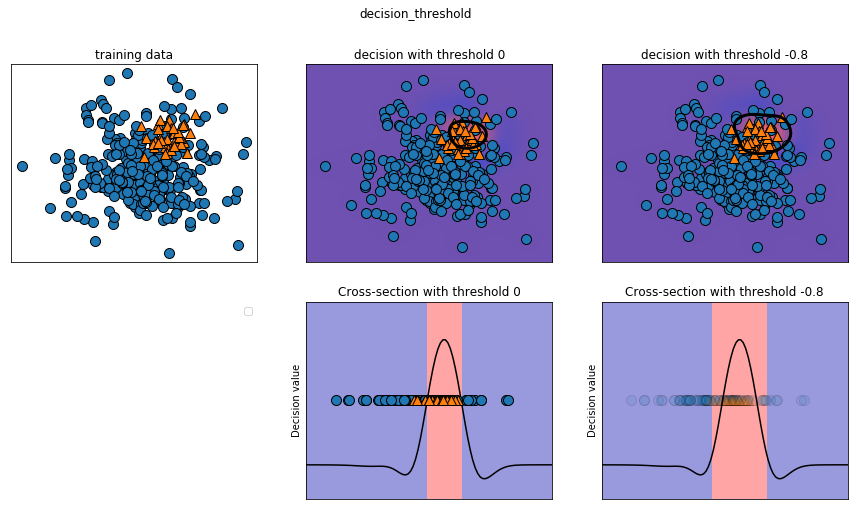

In [72]:
# 偏ったクラス分類（陽性50点、陰性400点） x SVC
from mglearn.datasets import make_blobs
x,y = make_blobs(n_samples=(400,50), centers=2, cluster_std=[7.0, 2], random_state=22)
ax,ex,ay,ey = train_test_split(x, y, random_state=0)
ms = SVC(gamma=.05).fit(ax,ay)
mglearn.plots.plot_decision_threshold()

In [73]:
# -> 左図：　訓練データ（2クラス。赤：陽性、青：陰性）
#      中図：　閾値0の決定境界。上図：　黒い円：decision_function=0。　下図：　断面図ヒートマップ
#      右図：　閾値0.8の決定境界

In [74]:
# 適合率、再現率、f-値の集計（分類レポート）
print(classification_report(ey, ms.predict(ex)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [75]:
# -> クラス1の識別がうまくいかない（適合率、再現率、f値低い）。
#      クラス0がクラス1よりはるかに多い（104点と9点）　→　クラス0を識別することに集中してしまった様子。
#      健康診断の場合はクラス1の再現率を上げたい。

In [76]:
# クラス１の再現率（実際陽性の内の正解率）を上げるよう、閾値を減らす(デフォルト0 →　-0.8)
t = ms.decision_function(ex) > -.8
print(classification_report(ey, t))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [77]:
# -> 再現率を上げることができた。
#      ただし実際にはテストセットを使ってはいけない。検証セットを使うか、交差検証を使うこと。

適合率-再現率カーブとROCカーブ
- 閾値の変更で、適合率と再現率のトレードオフを調整可能。
- 陽性サンプルを見落とす割合を10%以下にしたい　＝　再現率を90%にすればいい（が、適合率が問題）

作動ポイント設定　：　
- 再現率90%以上などの要請を分類器に設定すること。
- ビジネスでは、モデルの性能を関係者に保証することになる。

適合率-再現率カーブ
- 全ての可能な適合率と再現率の組み合わせをプロットしたもの。新しいモデルではこれで判断。

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


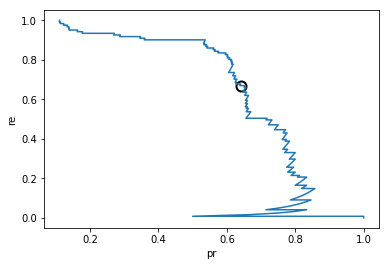

In [78]:
# 適合率-再現率カーブ(SVC)
from sklearn.metrics import precision_recall_curve
# データポイントを増やす（カーブがなめらかになるように）
x,y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
ax, ex, ay, ey = train_test_split(x, y, random_state=0)
ms = SVC(gamma=.05).fit(ax, ay)
# 適合率、再現率、閾値計算
pr, re, th = precision_recall_curve(ey, ms.decision_function(ex))
# 閾値ゼロに最も近い点のインデックスを取得
z = np.argmin(np.abs(th))
# 閾値ゼロに最も近い点を黒丸でプロット（decision_functionデフォルト）（predict時のトレードオフ点）
plt.plot(pr[z], re[z], 'o', markersize=10, label="th=0", fillstyle="none", c='k', mew=2)
# 適合率-再現率カーブプロット
plt.plot(pr, re, label="curve")
plt.xlabel("pr")
plt.ylabel("re");

In [79]:
# カーブ右上に近いほど、良い分類器（ある閾値で、適合率、再現率共に高い）
# カーブ左上　：　閾値最低。全てを陽性に分類。　閾値大で右下へ。

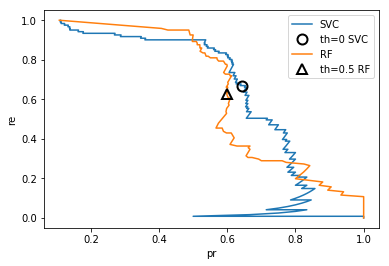

In [80]:
# 適合率-再現率カーブ(SVCとランダムフォレスト比較)
from sklearn.ensemble import RandomForestClassifier
mr = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
mr.fit(ax, ay)
# 適合率、再現率、閾値計算（ランダムフォレスト）（predict_probaはあるがdecision_functionがない）
prr, rer, thr = precision_recall_curve(ey, mr.predict_proba(ex)[:, 1])
# 適合率-再現率カーブプロット（SVC）
plt.plot(pr, re, label="SVC")
# 黒丸プロット（SVC）
plt.plot(pr[z], re[z], 'o', markersize=10, label="th=0 SVC", fillstyle="none", c='k', mew=2)
# 適合率-再現率カーブプロット（ランダムフォレスト）
plt.plot(prr, rer, label="RF")
# 黒丸準備（ランダムフォレスト）（デフォルトの閾値0.5に最も近い点）
zr = np.argmin(np.abs(thr - 0.5))
# 黒丸プロット（SVC）
plt.plot(prr[zr], rer[zr], '^', c='k', markersize=10, label="th=0.5 RF", fillstyle="none", mew=2) 
plt.xlabel("pr")
plt.ylabel("re")
plt.legend();

In [81]:
# -> 適合率、再現率が共に高い状態を求めるなら青（SVC）
#      f値だけではわからない性能を見られる（f値はデフォルト閾値の１点しか見ていない）

In [82]:
# 上記のf値
print("RF : ", f1_score(ey, mr.predict(ex)))
print("SVC : ", f1_score(ey, ms.predict(ex)))

RF :  0.6097560975609757
SVC :  0.6558704453441295


In [83]:
# 上記カーブは人の目で判断したが、自動化したい　→　カーブの下の領域を積分した平均適合率を用いる

平均適合率（average precision)：
- 適合率-再現率カーブの下の領域を積分した値。0~1。大きいほど良い。
- decision_functionにランダム値を返す分類器では、平均適合率はデータセット中の陽性サンプルの割合。


In [84]:
# 平均適合率
from sklearn.metrics import average_precision_score
apr = average_precision_score(ey, mr.predict_proba(ex)[:, 1])
aps = average_precision_score(ey, ms.decision_function(ex))
print("RF : ", apr)
print("SVC : ", aps)

RF :  0.659559370099291
SVC :  0.6663140319391998


In [85]:
# -> 積分すると、ランダムフォレストの方がやや高い。f値の結果とは異なる。

受信者動作特性(ROC　：)
- 様々な閾値に対する分類器の挙動解析用の道具
- 適合率-再現率カーブと同様、与えられた分類器の全ての閾値をプロット
- 偽陽性率(fpt)と真陽性率(tpr)（=再現率）をプロット
- 注意：　閾値選択時にテストセットの使用は禁止（検証セットを使うこと）

偽陽性率：
- 全ての陰性サンプル数に対する偽陽性数の割合（実際陰性の内の偽陽性の割合）
- fpr = FP / ( FP + TN )

AUC (Area Under the Curve）:
- ROCカーブの下の領域を積分した値。0~1。高いほど良い。完全ランダムで0.5。
- 偏ったデータの分類では精度よりAUCの方がはるかに良い。
- 陽性サンプルのランキングを評価
- ランダム選択した陰性サンプルのスコアより高くなる確率に等しい
- 1：　全ての陽性サンプルのスコアが、全ての陰性サンプルのスコアより高くなる（決定関数で）ことを表す。
 - →　適切な閾値で、このモデルがデータを完璧に分類可能ということ
- ただしAUCはデフォルト閾値を用いないため、閾値指定が必要。

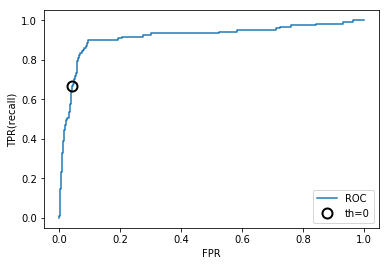

In [86]:
# ROCカーブ（SVC)
from sklearn.metrics import roc_curve
fpr, tpr, th = roc_curve(ey, ms.decision_function(ex))
# ROCカーブプロット（ランダムフォレスト)
plt.plot(fpr, tpr, label="ROC")
# 黒丸プロット（閾値0に最も近い点）
zs = np.argmin(np.abs(th))
plt.plot(fpr[zs], tpr[zs], 'o', markersize=10, label="th=0", fillstyle="none", c='k', mew=2)
# 軸ラベルと凡例
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.legend();

In [87]:
# -> ROCカーブで理想的な点は左上（偽陽性率低く、再現率高い）

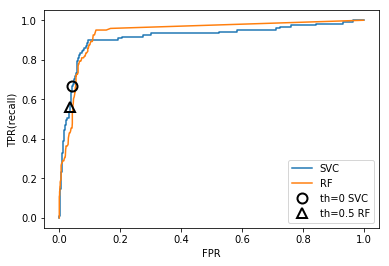

In [88]:
# ROCカーブ（SVCとランダムフォレスト比較）
from sklearn.metrics import roc_curve
fprr, tprr, thr = roc_curve(ey, mr.predict_proba(ex)[:,1])
# ROCカーブプロット（SVC、ランダムフォレスト)
plt.plot(fpr, tpr, label="SVC")
plt.plot(fprr, tprr, label="RF")
# 黒丸プロット（SVC、ランダムフォレスト)
plt.plot(fpr[zs], tpr[zs], 'o', markersize=10, label="th=0 SVC", fillstyle="none", c='k', mew=2)
zr = np.argmin(np.abs(thr - 0.5))
plt.plot(fpr[zr], tpr[zr], '^', markersize=10, label="th=0.5 RF", fillstyle="none", c='k', mew=2)
# 軸ラベルと凡例
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.legend();

In [89]:
# AUC
from sklearn.metrics import roc_auc_score
aucr = roc_auc_score(ey, mr.predict_proba(ex)[:,1])
aucs = roc_auc_score(ey, ms.decision_function(ex))
print("RF : ", aucr)
print("SVC : ", aucs)

RF :  0.9366953672911659
SVC :  0.9162935036712654


In [90]:
# -> ランダムフォレストの方が若干高い

gamma = 1.00 acc = 0.90 AUC = 0.50
gamma = 0.05 acc = 0.90 AUC = 1.00
gamma = 0.01 acc = 0.90 AUC = 1.00


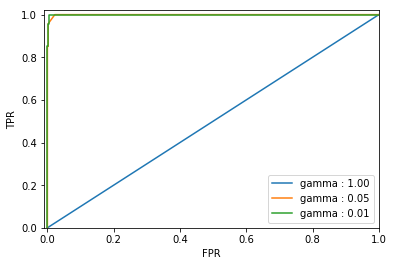

In [91]:
# 精度とAUCの比較（偏ったデータ(9とNOT9)）
# 偏ったデータセット作成
from sklearn.datasets import load_digits
# データロード
d = load_digits()
y = d.target == 9
ax,ex,ay,ey = train_test_split(d.data, y, random_state=0)
plt.figure()
# gammaを3種類試す
for gamma in [1, 0.05, 0.01]:
    ms = SVC(gamma=gamma).fit(ax, ay)
    acc = ms.score(ex, ey)
    auc = roc_auc_score(ey, ms.decision_function(ex))
    fpr, tpr, _ = roc_curve(ey, ms.decision_function(ex))
    # gammaと精度とAUC
    print("gamma = {:.2f} acc = {:.2f} AUC = {:.2f}".format(gamma, acc, auc))
    # ROCカーブ
    plt.plot(fpr, tpr, label="gamma : {:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend();

In [92]:
# -> accは全て90%　→　チャンスレベル（乱数でも得られる）かも
#      しかしAUCを見ると違う。gamma1.0ではAUC0.5でチャンスレベルだが、
#      gamma0.05と0.01ではAUC1.0　
#      →　全ての陽性データポイントが全ての陰性データポイントより、決定関数でスコアが良い
#           適切な閾値で、このモデルがデータを完璧に分類可能

5.3.3 多クラス分類の基準
- 多クラス分類は2クラス分類より評価が難しい
- 多クラス分類の評価基準は、基本的に2クラス分類の基準から導出されたもので、全てのクラスの平均。
 - →　やはり精度は危険（偏ったデータではダメ）
- 混同行列、分類レポートが使える
- f値が多い

f値（多クラス版）の求め方：
- 個々のクラスに対して2クラス版f値を算出　→　
 - macro平均　：　重みなしで平均（クラスのサイズ無視）（個々のクラスを同じように重視する場合に用いる）
 - weighted平均　：　各クラスの指示度で重み付けして平均。（分類レポートで表示）
 - micro平均　：　全てのクラスの偽陽性、偽陰性、真陽性の総数を計算　→　適合率、再現率、f値を計算
   - 個々のサンプルを同じように重視する場合に用いる。
 
 


p292

In [93]:
# 精度と混同行列（多クラス分類　x digits x 10クラス分類）
from sklearn.metrics import accuracy_score
ax,ex,ay,ey = train_test_split(d.data, d.target, random_state=0)
ml = LogisticRegression().fit(ax,ay)
pl = ml.predict(ex)
# 精度と混同行列
print(accuracy_score(ey, pl))
print(confusion_matrix(ey, pl));

0.9533333333333334
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [94]:
# -> 精度95%（普通のデータなので、普通に高性能）
#      混同行列の行は実際ラベル、列は予測ラベル

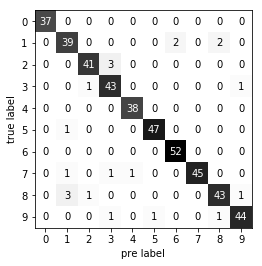

In [95]:
# 混同行列のヒートマップ
h = mglearn.tools.heatmap(confusion_matrix(ey, pl), xlabel='pre label', ylabel='true label', 
                         xticklabels=d.target_names,
                         yticklabels=d.target_names, cmap=plt.cm.gray_r, fmt="%d")
# y軸を逆向き（下向き）に
plt.gca().invert_yaxis();

In [96]:
# -> 見方：　
#      数字0　：　実ラベル数37に対し、予測ラベル数37（全て正しく予測）（偽陰性はなし）
#      数字2 : 数字３に間違って予測されているものもある

In [97]:
# 分類レポート（適合率、再現率、f値）
print(classification_report(ey, pl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

   micro avg       0.95      0.95      0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [99]:
# -> 数字0　：　ヒートマップと同様、
#  　　　数字7 : 予測陽性の内の正解率100%　→　適合率100%（他クラスが7と判断されることはない）
#     数字6　：　実際陽性の内の正解率100% →　再現率100%

In [101]:
# micro平均、macro平均
print(f1_score(ey, pl, average="micro"))
print(f1_score(ey, pl, average="macro"))

0.9533333333333334
0.9539995483362096


5.3.4 回帰の基準
- デフォルトのR^2スコアで充分（実際に試した結果。scoreメソッドのデフォルトのR^2）
 - 平均二乗誤差や平均絶対誤差より、最も直感的
- 回帰の評価を分類と同様に行うことも可能（ターゲットより大きく予想したか、などを解析）

5.3.5 評価基準を用いたモデル選択
- GridSearchCVやcross_val_scoreによるモデル選択基準として、AUCを用いることが可能（sklearnで）
 - 引数scoringで、利用したい評価基準を文字列で与えるだけ
 - 例：　digitsデータセットのNOT9タスクでのVMクラス分類器をAUCスコアで評価したい　：
   - "roc_auc"を与える
 
重要なscoringパラメタ：
- 分類：
 - accuracy（デフォルト）
 - roc_auc（AUC　：　ROCカーブの下の面積）
 - average_precision（適合率-再現率カーブの下の面積）
 - f1（macro, weighted, micro)
- 回帰：
 - r2（ R^2スコア)
 - mean_squared_error(平均以上誤差）
 - mean_absolute_error（平均絶対誤差）
- 引数はこちら参照：
 - metrics.scorerモジュールのSCORERS辞書
 - http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

In [106]:
# cross_val_scoreのデフォルトの分類スコアは精度を基準としている
defo = cross_val_score(SVC(), d.data, d.target == 9)
print("defo : ", defo)
acc = cross_val_score(SVC(), d.data, d.target == 9, scoring="accuracy")
print("acc : ", acc)
auc = cross_val_score(SVC(), d.data, d.target == 9, scoring="roc_auc")
print("auc : ", auc)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change fro

defo :  [0.89983306 0.89983306 0.89983306]


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


acc :  [0.89983306 0.89983306 0.89983306]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


auc :  [0.99372294 0.98957947 0.99594929]


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [107]:
# -> デフォルトと精度指定が同じ　→　デフォルトは精度ということ

In [110]:
# 同様にGridSearchCVでパラメタ調整する際の基準も変更可能
ax, ex, ay, ey = train_test_split(d.data, d.target == 9, random_state=0)
# わざと悪いgammaを使用
pg = {'gamma' : [0.0001, 0.01, 0.1, 1, 10]}
# 精度で評価（デフォルト）
g = GridSearchCV(SVC(), param_grid=pg)
g.fit(ax, ay)
print("GridSearch with acc")
print("Best params : ", g.best_params_)
print("Best CV score : ", g.best_score_)
print("Test set AUC : ", roc_auc_score(ey, g.decision_function(ex)))
print("Test set acc", g.score(ex, ey))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch with acc
Best params :  {'gamma': 0.0001}
Best CV score :  0.9703043801039347
Test set AUC :  0.9919222849902327
Test set acc 0.9733333333333334


In [112]:
# AUCで評価（明示的に引数で指定　：　scoring="roc_auc"）
g = GridSearchCV(SVC(), param_grid=pg, scoring="roc_auc")
g.fit(ax, ay)
print("GridSearch with AUC")
print("Best params : ", g.best_params_)
print("Best CV score : ", g.best_score_)
print("Test set AUC", g.score(ex, ey))

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearch with AUC
Best params :  {'gamma': 0.01}
Best CV score :  0.997467845027512
Test set AUC 0.999524840293543


In [ ]:
# -> 精度を用いるとgamma=0.0001、AUCを用いるとgamma=0.01
#      いずれの場合も、交差検証精度はテスト精度と整合している。
#      （AUCを用いて見つけたパラメタの方が、AUCだけでなく、精度の面で良いスコア）

In [113]:
# 指定できる引数一覧
from sklearn.metrics.scorer import SCORERS
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


5.4 まとめ

重要1： テストセットの使用は最後の1回だけ！（利用済みにしないこと）
- 方法1: 　データを3つに分ける（訓練データ、検証データ、テストデータ）　→　検証データでパラメタ選択
- 方法2：　データを２つに分ける（訓練データ、テストデータ）　→　訓練データに対し交差検証でパラメタ選択
 - （こちらの方が多い）
 
重要2： ビジネス視点での評価基準を持つこと
- 実問題では偏ったデータがほとんど
- ビジネス決定について　：　参考書籍「戦略的データサイエンス」（オライリー）